In [2]:
from google.colab import files
uploaded = files.upload()


Saving test.csv to test.csv
Saving train.csv to train.csv


In [3]:
import pandas as pd

In [6]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [7]:
import seaborn as sns

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [12]:
df = pd.read_csv('train.csv')

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

In [15]:
df.dropna(inplace=True)

In [18]:
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])

In [19]:
X = df.drop('Survived', axis=1)
y = df['Survived']


In [20]:
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

RandomForestClassifier(random_state=42)

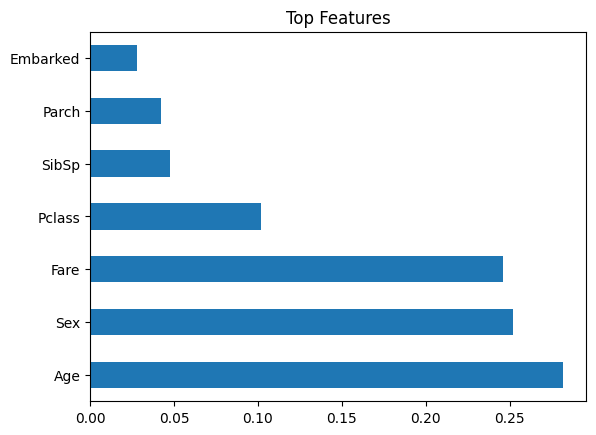

In [21]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(7).plot(kind='barh')
plt.title("Top Features")
plt.show()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [25]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7832167832167832

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.81        80
           1       0.78      0.71      0.74        63

    accuracy                           0.78       143
   macro avg       0.78      0.78      0.78       143
weighted avg       0.78      0.78      0.78       143


Confusion Matrix:
 [[67 13]
 [18 45]]
